# Ahmet Emre Usta

## 2200765036


# Necessary Imports


In [1]:
import os
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings("ignore")

In [2]:
working_dir = "/".join(os.getcwd().split("/")[:-1])
DATASETS_PATH = os.path.join(working_dir, "datasets")
RAW_DATASET_PATH = os.path.join(DATASETS_PATH, "raw")
RAW_DATASET = os.path.join(RAW_DATASET_PATH, "data.csv")

# EDA


In [3]:
df = pd.read_csv(RAW_DATASET)
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78096 non-null  int64  
 1   User    78096 non-null  int64  
 2   X0      78096 non-null  float64
 3   Y0      78096 non-null  float64
 4   Z0      78096 non-null  float64
 5   X1      78096 non-null  float64
 6   Y1      78096 non-null  float64
 7   Z1      78096 non-null  float64
 8   X2      78096 non-null  float64
 9   Y2      78096 non-null  float64
 10  Z2      78096 non-null  float64
 11  X3      78096 non-null  object 
 12  Y3      78096 non-null  object 
 13  Z3      78096 non-null  object 
 14  X4      78096 non-null  object 
 15  Y4      78096 non-null  object 
 16  Z4      78096 non-null  object 
 17  X5      78096 non-null  object 
 18  Y5      78096 non-null  object 
 19  Z5      78096 non-null  object 
 20  X6      78096 non-null  object 
 21  Y6      78096 non-null  object 
 22

In [5]:
# Since first row all zero drop it
df.drop(df.index[0], inplace=True)

There are some ? in the dataset


In [6]:
df = df.replace("?", np.nan)

In [7]:
# look if there is any null values
df.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         690
Y3         690
Z3         690
X4        3120
Y4        3120
Z4        3120
X5       13023
Y5       13023
Z5       13023
X6       25848
Y6       25848
Z6       25848
X7       39152
Y7       39152
Z7       39152
X8       47532
Y8       47532
Z8       47532
X9       54128
Y9       54128
Z9       54128
X10      63343
Y10      63343
Z10      63343
X11      78064
Y11      78064
Z11      78064
dtype: int64

5 unique classes in the dataset. There isn't any class imbalance.

14 unique user


In [8]:
for col in df.columns:
    print(f"Column: {col}", df[col].value_counts())

Column: Class Class
3    16344
1    16265
5    15733
2    14978
4    14775
Name: count, dtype: int64
Column: User User
10    9573
0     9048
13    8739
11    8061
14    7495
8     6811
5     5105
12    4865
1     4717
2     4513
6     4377
9     3920
7      492
4      379
Name: count, dtype: int64
Column: X0 X0
 69.911667    3
 36.034810    2
 82.247808    2
 55.555396    2
-19.866734    2
             ..
 58.822684    1
 59.344821    1
 60.120186    1
 61.019123    1
 27.898705    1
Name: count, Length: 78086, dtype: int64
Column: Y0 Y0
93.925616     3
88.677370     2
79.067477     2
86.013554     2
89.857483     2
             ..
85.207615     1
85.087776     1
85.124831     1
85.111189     1
108.092877    1
Name: count, Length: 78089, dtype: int64
Column: Z0 Z0
-7.769514     3
-15.908092    2
-24.200284    2
 11.618245    2
 24.928390    2
             ..
-20.382944    1
-19.154824    1
-18.370686    1
-18.548685    1
 11.107857    1
Name: count, Length: 78089, dtype: int64
Column: 

There is some ? in the datasets which we need to manipulate.

- X3: Contains 690 '?' values.
- Y3: Contains 690 '?' values.
- Z3: Contains 690 '?' values.
- X4: Contains 3120 '?' values.
- Y4: Contains 3120 '?' values.
- Z4: Contains 3120 '?' values.
- X5: Contains 13023 '?' values.
- Y5: Contains 13023 '?' values.
- Z5: Contains 13023 '?' values.
- X6: Contains 25848 '?' values.
- Y6: Contains 25848 '?' values.
- Z6: Contains 25848 '?' values.
- X7: Contains 39152 '?' values.
- Y7: Contains 39152 '?' values.
- Z7: Contains 39152 '?' values.
- X8: Contains 47532 '?' values.
- Y8: Contains 47532 '?' values.
- Z8: Contains 47532 '?' values.
- X9: Contains 54128 '?' values.
- Y9: Contains 54128 '?' values.
- Z9: Contains 54128 '?' values.
- X10: Contains 63343 '?' values.
- Y10: Contains 63343 '?' values.
- Z10: Contains 63343 '?' values.
- X11: Contains 78064 '?' values.
- Y11: Contains 78064 '?' values.
- Z11: Contains 78064 '?' values.

These columns have missing or uncertain values denoted by '?'.

Since some rows almost completely empty, droping them is make sense to making dataset more robust.


In [9]:
# Drop columns with '?' values
cols_to_drop = [
    "X6",
    "Y6",
    "Z6",
    "X7",
    "Y7",
    "Z7",
    "X8",
    "Y8",
    "Z8",
    "X9",
    "Y9",
    "Z9",
    "X10",
    "Y10",
    "Z10",
    "X11",
    "Y11",
    "Z11",
]
df = df.drop(columns=cols_to_drop)

In [10]:
df.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         690
Y3         690
Z3         690
X4        3120
Y4        3120
Z4        3120
X5       13023
Y5       13023
Z5       13023
dtype: int64

In [11]:
# convert them to float
df = df.astype(float)

In [12]:
# fill the empty values with mean of the column
df = df.fillna(df.mean())

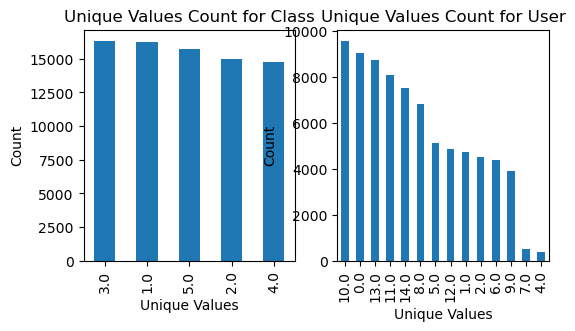

In [13]:
categorical = ["Class", "User"]

fig = plt.figure(figsize=(6, 3))

for i, col in enumerate(categorical):
    value_counts = df[col].value_counts()
    plt.subplot(1, 2, i + 1)
    value_counts.plot(kind="bar")
    plt.title(f"Unique Values Count for {col}")
    plt.xlabel("Unique Values")
    plt.ylabel("Count")

# plt.subplots_adjust(hspace=10)
plt.show()

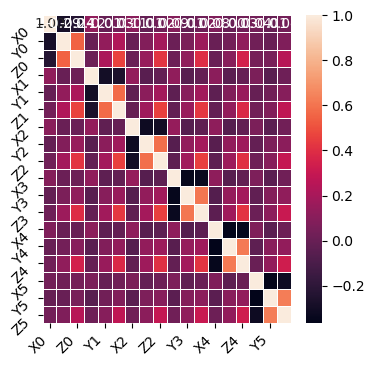

In [14]:
fig = plt.figure(figsize=(4, 4))

correlation = df.drop(categorical, axis=1).corr()

# plt.figure(figsize=(6, 6))
sns.heatmap(correlation, annot=True, cbar=True, linewidths=0.5, fmt=".2f")

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45, va="top")

plt.show()

# Set Dataset


In [15]:
# Divide X and y
X = df.drop(["Class"], axis=1)
y = df["Class"]

In [16]:
# One-hot encode the 'User' column
X = pd.get_dummies(X, columns=["User"])

# Extract columns to be scaled
columns_to_scale = X.columns.difference(["User"])

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected columns
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [17]:
X.head()

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,...,User_5.0,User_6.0,User_7.0,User_8.0,User_9.0,User_10.0,User_11.0,User_12.0,User_13.0,User_14.0
1,0.545320,0.634610,0.258055,0.627813,0.520383,0.344384,0.485403,0.678388,0.327415,0.749610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.552902,0.637601,0.270018,0.502106,0.670846,0.430027,0.629502,0.535526,0.254553,0.758052,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.550633,0.638358,0.267404,0.498287,0.671194,0.426297,0.626890,0.536690,0.251666,0.755710,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.548890,0.635509,0.262714,0.493536,0.668331,0.418368,0.653507,0.628324,0.244963,0.659668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.548263,0.634493,0.260681,0.492251,0.667160,0.415697,0.621934,0.532450,0.243484,0.753934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# use label encoder to encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

In [19]:
np.unique(y)

array([0, 1, 2, 3, 4])

In [20]:
model_performances = pd.DataFrame(
    columns=[
        "Model Name",
        "Minimum Cross-Validation Score",
        "Maximum Cross-Validation Score",
        "Mean Cross-Validation Score",
        "Cross-Validation Standard Deviation",
    ]
)

Given its ability to provide more robust and reliable results compared to the traditional train-test split approach, I prefer utilizing cross-validation for its enhanced performance evaluation.


# Random Forest Classifier


In [21]:
# 5 class classification using cross validation
rf = RandomForestClassifier(random_state=42)

rf_cv_scores = cross_val_score(rf, X, y, cv=5, scoring="accuracy")
print(f"Random Forest Classifier CV Scores: {rf_cv_scores}")
print(f"Random Forest Classifier CV Mean Score: {rf_cv_scores.mean()}")
print(f"Random Forest Classifier CV Standard Deviation: {rf_cv_scores.std()}")

Random Forest Classifier CV Scores: [0.74313336 0.68909661 0.7911518  0.7302004  0.6981881 ]
Random Forest Classifier CV Mean Score: 0.7303540559574876
Random Forest Classifier CV Standard Deviation: 0.03632223920943675


In [22]:
new_row = {
    "Model Name": "Random Forest",
    "Minimum Cross-Validation Score": rf_cv_scores.min(),
    "Maximum Cross-Validation Score": rf_cv_scores.max(),
    "Mean Cross-Validation Score": rf_cv_scores.mean(),
    "Cross-Validation Standard Deviation": rf_cv_scores.std(),
}
model_performances.loc[len(model_performances)] = new_row

# Naive Bayes


In [23]:
# 5 class classification using cross validation with Naive Bayes
nb = GaussianNB()

nb_cv_scores = cross_val_score(nb, X, y, cv=5, scoring="accuracy")
print(f"Naive Bayes Classifier CV Scores: {nb_cv_scores}")
print(f"Naive Bayes Classifier CV Mean Score: {nb_cv_scores.mean()}")
print(f"Naive Bayes Classifier CV Standard Deviation: {nb_cv_scores.std()}")

Naive Bayes Classifier CV Scores: [0.20276586 0.31698572 0.17132979 0.24579038 0.28836673]
Naive Bayes Classifier CV Mean Score: 0.24504769831615342
Naive Bayes Classifier CV Standard Deviation: 0.053430802436174915


In [24]:
new_row_nb = {
    "Model Name": "Naive Bayes",
    "Minimum Cross-Validation Score": nb_cv_scores.min(),
    "Maximum Cross-Validation Score": nb_cv_scores.max(),
    "Mean Cross-Validation Score": nb_cv_scores.mean(),
    "Cross-Validation Standard Deviation": nb_cv_scores.std(),
}
model_performances.loc[len(model_performances)] = new_row_nb

# XGBoost


In [25]:
# 5 class classification using cross validation with XGBoost
xgb_model = XGBClassifier(random_state=42)

xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring="accuracy")
print(f"XGBoost Classifier CV Scores: {xgb_cv_scores}")
print(f"XGBoost Classifier CV Mean Score: {xgb_cv_scores.mean()}")
print(f"XGBoost Classifier CV Standard Deviation: {xgb_cv_scores.std()}")

XGBoost Classifier CV Scores: [0.75555413 0.65004162 0.7689993  0.68141366 0.69684359]
XGBoost Classifier CV Mean Score: 0.7105704590562777
XGBoost Classifier CV Standard Deviation: 0.045032757981968555


In [26]:
new_row_xgb = {
    "Model Name": "XGBoost",
    "Minimum Cross-Validation Score": xgb_cv_scores.min(),
    "Maximum Cross-Validation Score": xgb_cv_scores.max(),
    "Mean Cross-Validation Score": xgb_cv_scores.mean(),
    "Cross-Validation Standard Deviation": xgb_cv_scores.std(),
}
model_performances.loc[len(model_performances)] = new_row_xgb

# Comprassion


In [27]:
model_performances.head()

,Model Name,Minimum Cross-Validation Score,Maximum Cross-Validation Score,Mean Cross-Validation Score,Cross-Validation Standard Deviation
0,Random Forest,0.689097,0.791152,0.730354,0.036322
1,Naive Bayes,0.171330,0.316986,0.245048,0.053431
2,XGBoost,0.650042,0.768999,0.710570,0.045033


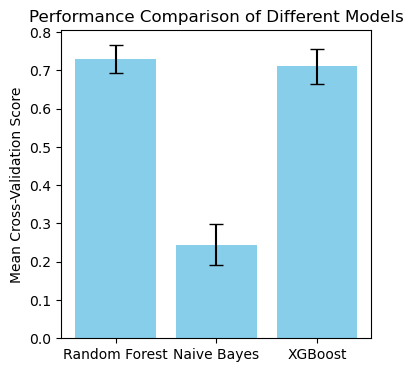

In [28]:
# Data preparation
models = model_performances["Model Name"]
mean_scores = model_performances["Mean Cross-Validation Score"]
std_deviation = model_performances["Cross-Validation Standard Deviation"]

# Plotting
fig, ax = plt.subplots(figsize=(4, 4))

ax.bar(models, mean_scores, yerr=std_deviation, capsize=5, color="skyblue")
ax.set_ylabel("Mean Cross-Validation Score")
ax.set_title("Performance Comparison of Different Models")

# Show the plot
plt.show()

The Random Forest Classifier demonstrates a robust performance with a mean cross-validation score of approximately 73.04%, showcasing consistent accuracy across different folds, albeit with a standard deviation of 3.63%.

On the other hand, the Naive Bayes Classifier exhibits a lower mean cross-validation score of around 24.50%, indicating comparatively weaker predictive performance. The standard deviation of 5.34% suggests notable variability in performance across folds.

XGBoost Classifier performs competitively with a mean cross-validation score of approximately 71.06%, demonstrating stable accuracy. The standard deviation of 4.50% indicates moderate variability in performance across different folds.

In summary, the Random Forest and XGBoost classifiers outperform the Naive Bayes Classifier in terms of predictive accuracy, with the Random Forest Classifier showing the highest and most consistent performance. The standard deviations provide insights into the stability and reliability of these models across various cross-validation folds.


In [29]:
# remove the unnecessary variables
del df, X, y, rf, nb, xgb_model, model_performances